## SVM Model Analysis

### SVM with Pixels

In [1]:
import numpy as np

with open("data/train_pixels.npy", "rb") as f:
    X_train = np.load(f)
    
with open("data/train_labels.npy", "rb") as f:
    y_train = np.load(f)
    
with open("data/test_pixels.npy", "rb") as f:
    X_test = np.load(f)
    
with open("data/test_labels.npy", "rb") as f:
    y_test = np.load(f)

In [2]:
X_train = X_train.reshape(-1, 48*48)
X_test = X_test.reshape(-1, 48*48)

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA

n_components = 110
pca = RandomizedPCA(n_components=n_components, whiten=True, random_state=42).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, 48, 48))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train_pca, y_train)

In [4]:
from matplotlib import pyplot as plt

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

def make_plot(images, titles, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((48, 48)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label \n\n')

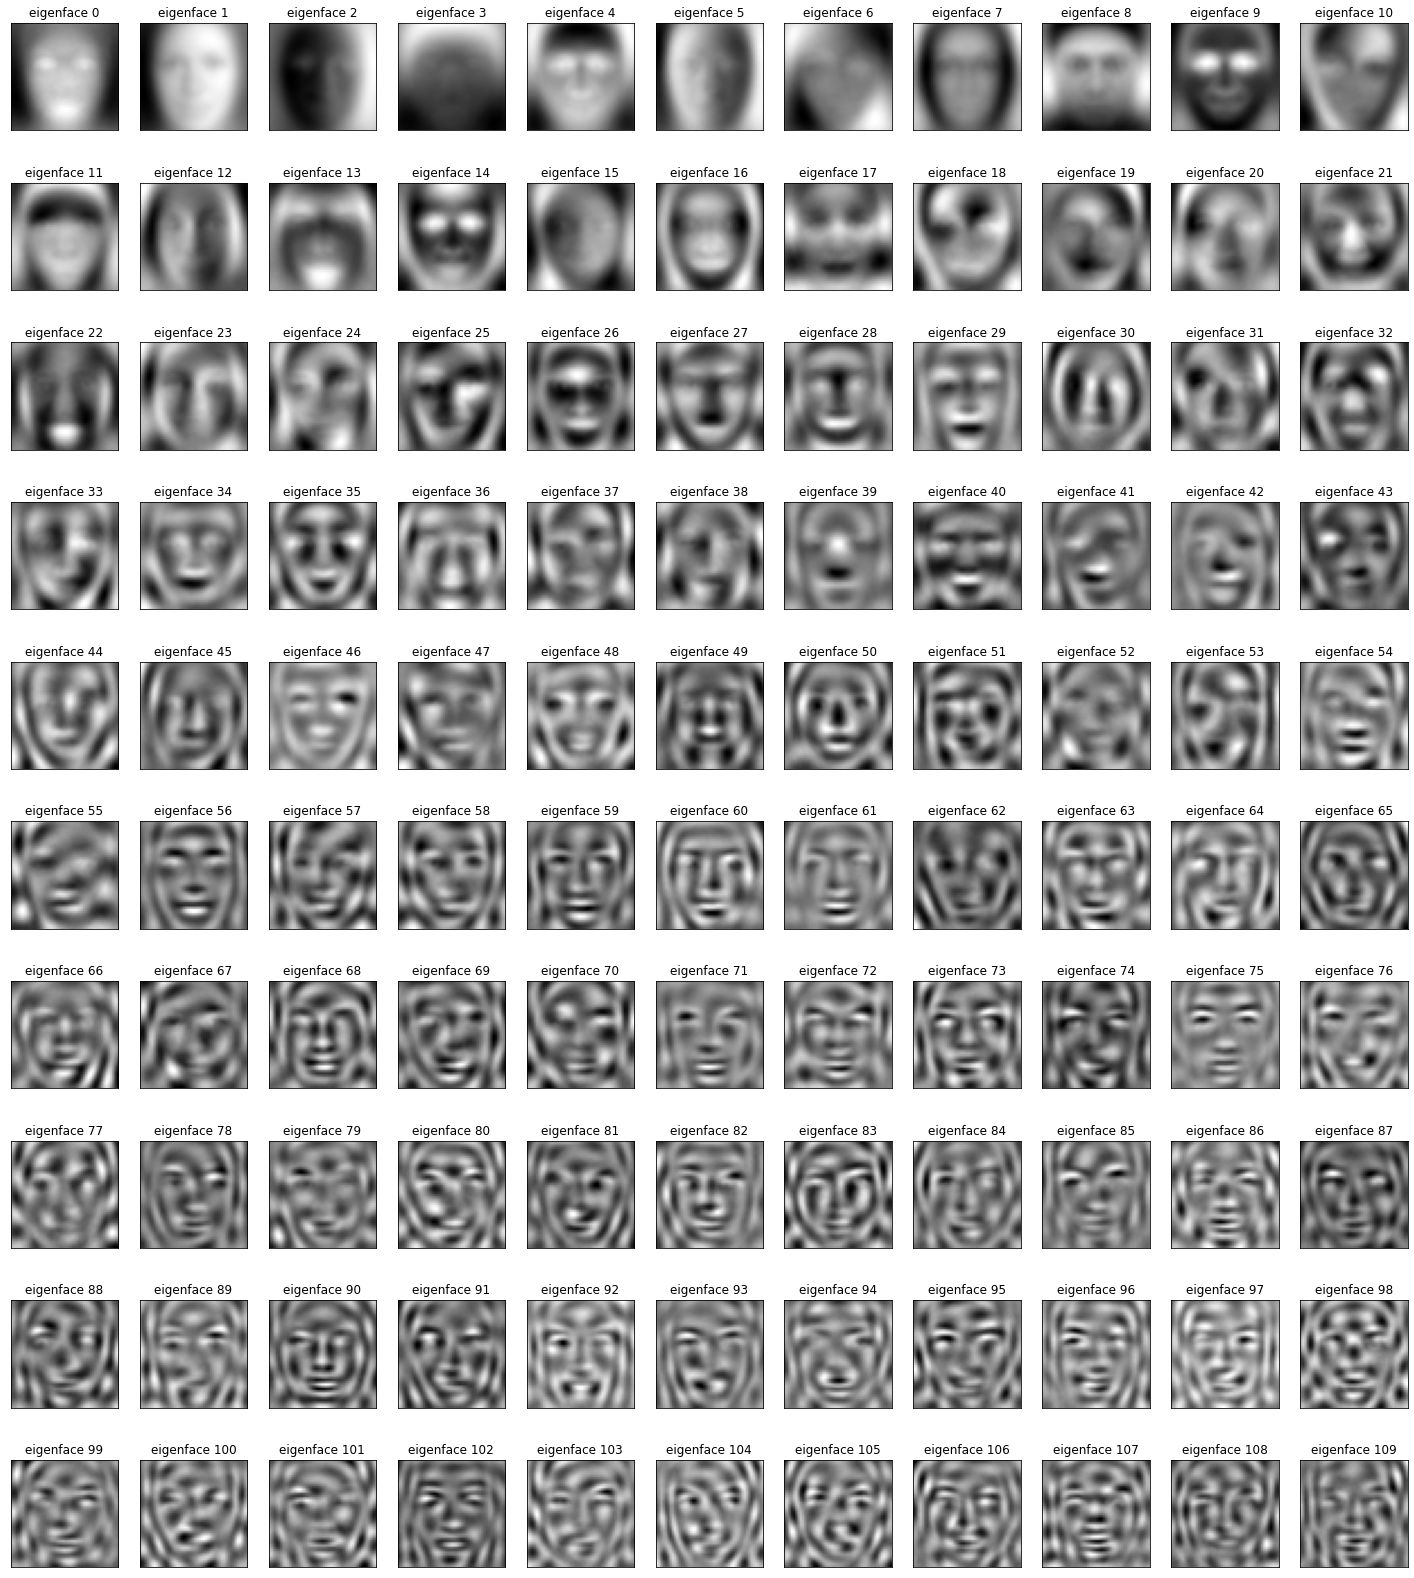

In [5]:
titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
make_plot(eigenfaces, titles, n_row=10, n_col=11)
plt.show()

In [6]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred)
print(score)

0.5550292560601839


In [7]:
from sklearn.metrics import classification_report

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(classification_report(y_test, y_pred, target_names=emotions))

              precision    recall  f1-score   support

       Angry       0.38      0.49      0.43       385
     Disgust       0.86      0.34      0.49        35
        Fear       0.60      0.27      0.37       119
       Happy       0.66      0.64      0.65       936
         Sad       0.36      0.47      0.40       490
    Surprise       0.65      0.64      0.65       433
     Neutral       0.62      0.55      0.58      1191

    accuracy                           0.56      3589
   macro avg       0.59      0.49      0.51      3589
weighted avg       0.58      0.56      0.56      3589



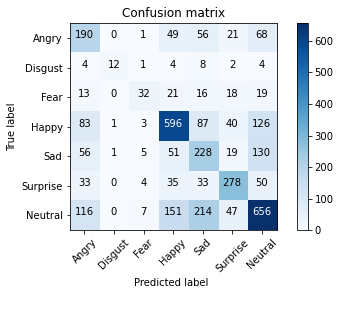

In [8]:
from sklearn.metrics import confusion_matrix
import itertools

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = emotions)

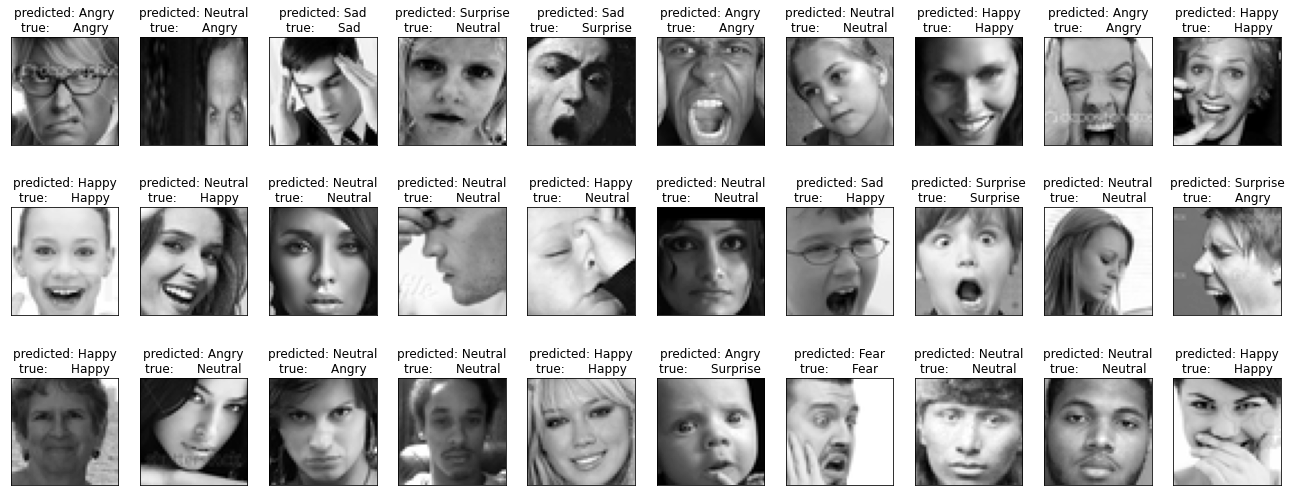

In [9]:
prediction_titles = [title(y_pred, y_test, emotions, i) for i in range(y_pred.shape[0])]
make_plot(X_test, prediction_titles, n_row=3, n_col=10)

### SVM with Face Landmarks

In [10]:
import numpy as np

with open("data/train_landmarks.npy", "rb") as f:
    X_train = np.load(f)
    
with open("data/train_labels.npy", "rb") as f:
    y_train = np.load(f)
    
with open("data/test_landmarks.npy", "rb") as f:
    X_test = np.load(f)
    
with open("data/test_labels.npy", "rb") as f:
    y_test = np.load(f)

In [11]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA

n_components = 80
pca = RandomizedPCA(n_components=n_components, whiten=True, random_state=42).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train_pca, y_train)

In [12]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred)
print(score)

0.5475062691557537


In [13]:
from sklearn.metrics import classification_report

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(classification_report(y_test, y_pred, target_names=emotions))

              precision    recall  f1-score   support

       Angry       0.42      0.48      0.45       385
     Disgust       0.44      0.23      0.30        35
        Fear       0.32      0.22      0.26       119
       Happy       0.65      0.69      0.67       936
         Sad       0.34      0.31      0.32       490
    Surprise       0.51      0.57      0.54       433
     Neutral       0.62      0.59      0.61      1191

    accuracy                           0.55      3589
   macro avg       0.47      0.44      0.45      3589
weighted avg       0.54      0.55      0.54      3589



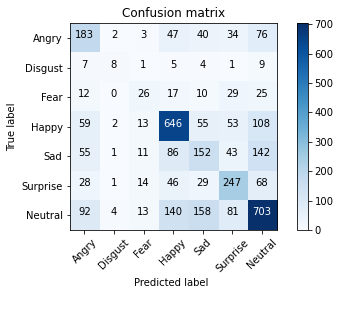

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = emotions)